# Project: Prioritization of Hypotheses and Analysis of A/B Test

## Introduction

The aim of this project is to identify the most important hypotheses for improving the service of a large online store. The project involves loading and preprocessing data, as well as evaluating hypotheses based on the ICE and RICE criteria. Furthermore, an analysis of the results of an A/B test conducted by the company will be performed. Metrics such as average order value and number of orders per user will be examined. Finally, a concluding summary will be provided, outlining the results of the analysis.

## Part 1: Hypotheses

 ### Imports and Data Upload

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('./datasets/hypothesis.csv', sep=';')

hypothesis.info()
hypothesis.columns = hypothesis.columns.str.lower()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
pd.options.display.max_colwidth = 100
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Add two new traffic acquisition channels, which will allow attracting 30% more users.",3,10,8,6
1,"Launch our own delivery service, which will reduce the delivery time for orders.",2,5,4,10
2,Add product recommendation blocks to the website of the online store to increase conversion rate...,8,3,7,3
3,Restructure the category hierarchy to improve conversion rates by helping users find the desired...,8,3,3,8
4,Change the background color of the main page to increase user engagement.,3,1,1,1
5,Add a page for customer reviews about the store to increase the number of orders.,3,2,2,3
6,Display banners with current promotions and sales on the main page to increase conversion.,5,3,8,3
7,Include a subscription form on all main pages to collect a customer database for email newsletters.,10,7,8,5
8,Launch a promotion offering discounts on products on the customer's birthday.,1,9,9,5


The dataset contains 9 rows of hypotheses, with each having values for parameters: reach, impact, confidence, and efforts. There are no missing values or duplicates in the data.

The data types are appropriate, and column names have been converted to lowercase.

### Prioritization of hypotheses via ICE and RICE frameworks

In [4]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(3)
hypothesis = hypothesis.sort_values(by='ICE', ascending=False)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
8,Launch a promotion offering discounts on products on the customer's birthday.,1,9,9,5,16.200
0,"Add two new traffic acquisition channels, which will allow attracting 30% more users.",3,10,8,6,13.333
7,Include a subscription form on all main pages to collect a customer database for email newsletters.,10,7,8,5,11.200
6,Display banners with current promotions and sales on the main page to increase conversion.,5,3,8,3,8.000
2,Add product recommendation blocks to the website of the online store to increase conversion rate...,8,3,7,3,7.000
1,"Launch our own delivery service, which will reduce the delivery time for orders.",2,5,4,10,2.000
5,Add a page for customer reviews about the store to increase the number of orders.,3,2,2,3,1.333
3,Restructure the category hierarchy to improve conversion rates by helping users find the desired...,8,3,3,8,1.125
4,Change the background color of the main page to increase user engagement.,3,1,1,1,1.000


During the prioritization of hypotheses using the ICE framework, it was determined that the hypothesis regarding offering a discount on the customer's birthday is the most prioritized, with an ICE score of 16.2.

Next in line is the hypothesis about attracting an additional 30% of users by adding two new traffic channels. The ICE score for this hypothesis is 13.3.

Ranked third is the hypothesis "Add a subscription form to all main pages to collect a customer database for email newsletters." Here, the ICE score is 11.2.

In [5]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(3)
hypothesis = hypothesis.sort_values(by='RICE', ascending=False)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Include a subscription form on all main pages to collect a customer database for email newsletters.,10,7,8,5,11.200,112.0
2,Add product recommendation blocks to the website of the online store to increase conversion rate...,8,3,7,3,7.000,56.0
0,"Add two new traffic acquisition channels, which will allow attracting 30% more users.",3,10,8,6,13.333,40.0
6,Display banners with current promotions and sales on the main page to increase conversion.,5,3,8,3,8.000,40.0
8,Launch a promotion offering discounts on products on the customer's birthday.,1,9,9,5,16.200,16.2
3,Restructure the category hierarchy to improve conversion rates by helping users find the desired...,8,3,3,8,1.125,9.0
1,"Launch our own delivery service, which will reduce the delivery time for orders.",2,5,4,10,2.000,4.0
5,Add a page for customer reviews about the store to increase the number of orders.,3,2,2,3,1.333,4.0
4,Change the background color of the main page to increase user engagement.,3,1,1,1,1.000,3.0


During the analysis using the RICE framework, taking into account the user reach, it was found that the most prioritized hypothesis is "Add a subscription form to all main pages to collect a customer database for email newsletters," which previously held the third position.

Additionally, the hypothesis about adding recommendation blocks to increase conversion and average order value received high priority.

The hypothesis about adding two new traffic channels moved from the second position to the third.

Changes in the prioritization of hypotheses occurred due to considering the user reach, which shifted down ideas that would not affect a large number of customers.

The RICE framework allows tracking more prioritized hypotheses because it takes into account the reach. This factor is extremely important because it helps identify changes that will affect more users, and consequently, bring in greater revenue if the hypothesis is correct. However, it is important to correctly assess each of the parameters: reach, impact, confidence, and efforts, to ensure an accurate evaluation.

## Step 2: A/B Test Analysis

### Data Upload

In [6]:
orders = pd.read_csv('./datasets/orders.csv')
visitors = pd.read_csv('./datasets/visitors.csv')


orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.duplicated().sum()

0

Two datasets were loaded containing information about user visits and orders. The dataset about visits has 5 fields, while the dataset about orders has 3 fields. There are 1197 rows in the orders dataset and 62 rows in the users dataset. The data is of high quality with no missing values or duplicates in either dataset. Date columns have been converted to datetime data type, and the column names are appropriate.

In [14]:
print(f"Number of A/B test groups: {len(visitors['group'].unique())}\nTest was conducted from {visitors['date'].min().date()} to {visitors['date'].max().date()}")

Number of A/B test groups: 2
Test was conducted from 2019-08-01 to 2019-08-31


In [15]:
a_count = orders[orders['group'] == 'A']['visitorId'].nunique()
b_count = orders[orders['group'] == 'B']['visitorId'].nunique()
print(f"Users in group A: {a_count}\nUsers in group B: {b_count}")
print("The relative difference between the size of group B and group A.: {0:.3f}".format(b_count / a_count - 1))

Users in group A: 503
Users in group B: 586
The relative difference between the size of group B and group A.: 0.165


It can be noticed that there is an imbalance between the groups - group B exceeds group A in users by 16.5%.

In [16]:
groups_count = orders.groupby('visitorId').agg({'group': 'nunique'}) 
both_groups_proportion = len(groups_count[groups_count['group'] > 1]) / orders['visitorId'].nunique()
print("Share of users, who ended up in both groups: {0:.3f}".format(both_groups_proportion))

Share of users, who ended up in both groups: 0.056


5,6% of users got into both test groups.

### A/B Test

#### Revenue and Average Bill Analysis

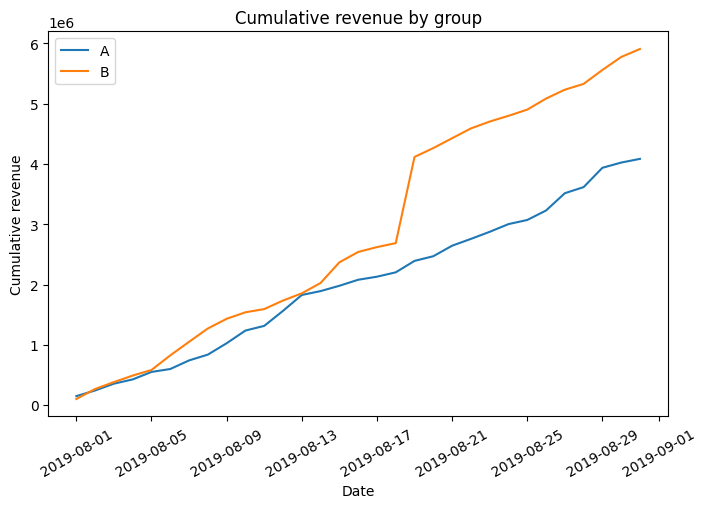

In [17]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

plt.figure(figsize=(8, 5))
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative revenue by group')
plt.xlabel('Date')
plt.ylabel('Cumulative revenue')
plt.xticks(rotation=30)
plt.legend()
plt.show()

The experiment was conducted during August 2019.

According to the graph, the cumulative revenue of group B significantly exceeded that of group A from around August 17, 2019. Apparently, a large order was made during the period from August 17 to August 21, which had a strong impact on this result. Further investigation is required as this graph does not allow us to draw conclusions about the difference between the groups.

It is worth noting that although the revenue of group B previously exceeded that of group A, this observation does not allow us to draw a conclusion, as it was made at the beginning of the test when the metrics had not yet stabilized.

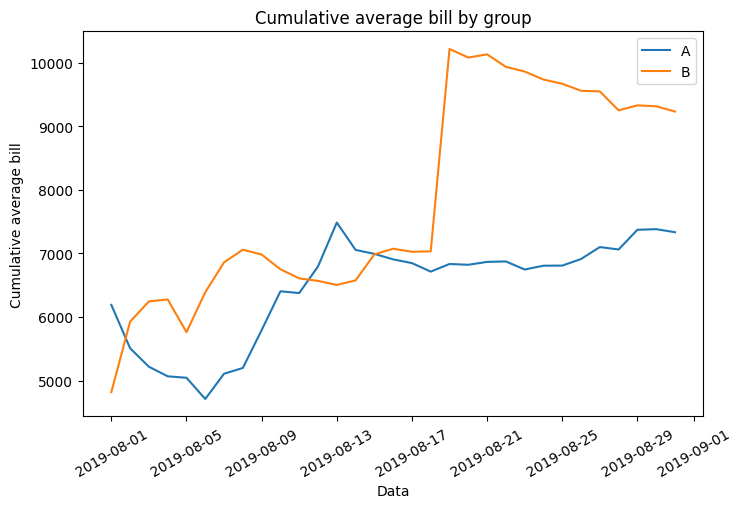

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative average bill by group')
plt.xlabel('Data')
plt.ylabel('Cumulative average bill')
plt.xticks(rotation=30)
plt.legend()
plt.show()

Similarly to the revenue, the cumulative average order value of group B experienced a significant spike during the period from August 17 to August 21, coinciding with the large order. Therefore, further analysis of other metrics is required to gain a comprehensive understanding of the situation.

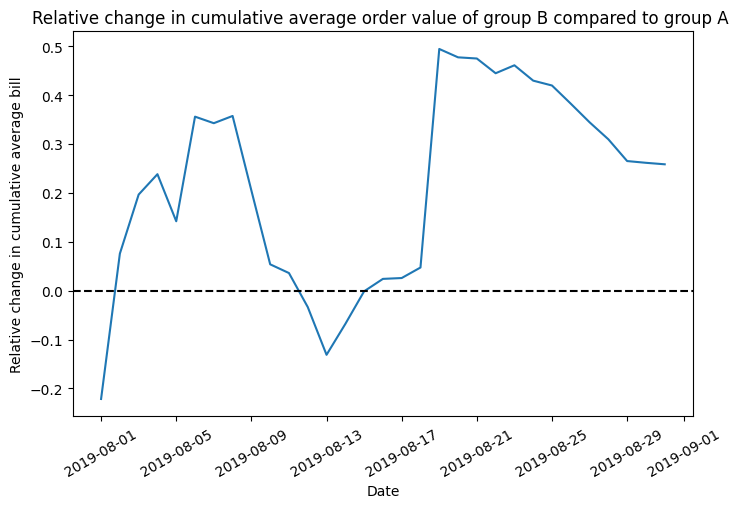

In [19]:
plt.figure(figsize=(8, 5))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative change in cumulative average order value of group B compared to group A ')
plt.xlabel('Date')
plt.ylabel('Relative change in cumulative average bill')
plt.xticks(rotation=30)
plt.show()

According to this graph, the average order value of group B significantly exceeded that of group A throughout the entire period, except for the period around August 11-15, when the cumulative average order value of group B was approximately 15% lower than that of group A. Subsequently, a large order was placed, and the difference between B and A reached about 50% at its peak and slightly less than 30% by the end of the month.

#### Average Order Count Analysis

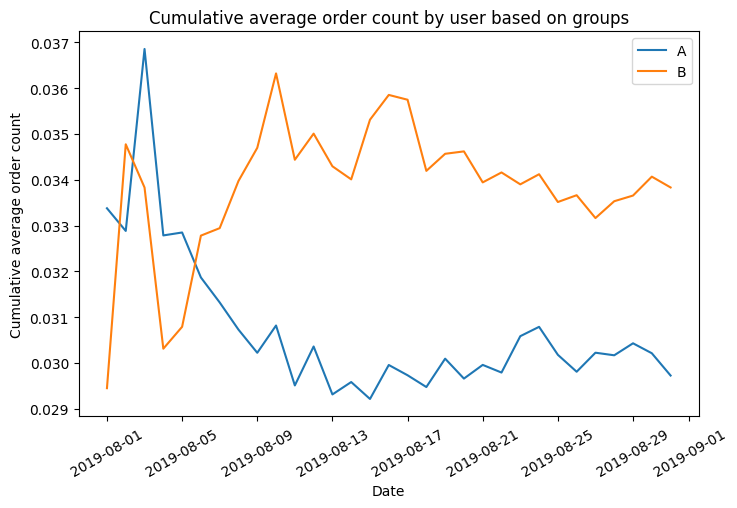

In [20]:
cumulativeOrdersA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'orders', 'visitors']]
cumulativeOrdersB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'orders', 'visitors']]
plt.figure(figsize=(8, 5))
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders'] / cumulativeOrdersA['visitors'], label='A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders'] / cumulativeOrdersB['visitors'], label='B')
plt.title('Cumulative average order count by user based on groups')
plt.xlabel('Date')
plt.ylabel('Cumulative average order count')
plt.xticks(rotation=30)
plt.legend()
plt.show()

According to the graph, the average number of orders fluctuated significantly at the beginning of the test. However, as the metrics stabilized, it became evident that group B consistently outperformed group A. Additionally, there are no outliers observed around August 17-21, further confirming the hypothesis of a single large order made during that time.

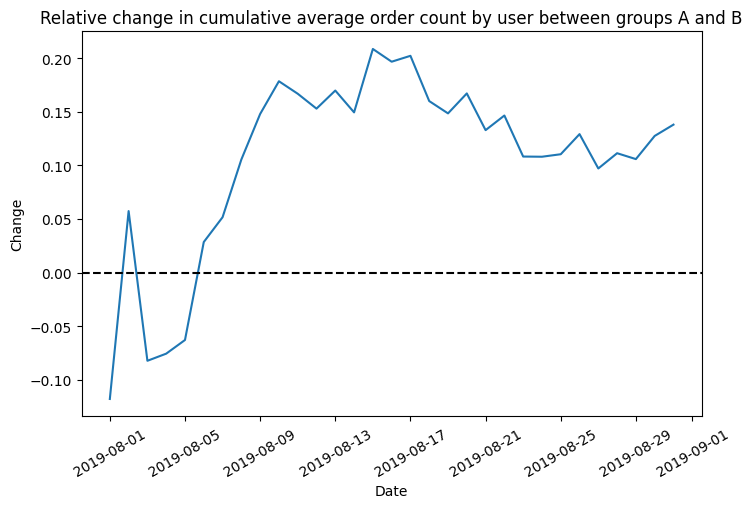

In [21]:
mergedCumulativeOrders = cumulativeOrdersA.merge(cumulativeOrdersB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(8, 5))
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB'] / mergedCumulativeOrders['visitorsB']) / (mergedCumulativeOrders['ordersA'] / mergedCumulativeOrders['visitorsA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative change in cumulative average order count by user between groups A and B')
plt.xlabel('Date')
plt.ylabel('Change')
plt.xticks(rotation=30)
plt.show()

According to the graph, after 2 weeks of the test, the cumulative average number of orders in group B exceeded that of group A by approximately 20%. Subsequently, the metric decreased and fluctuated around 10-15%, indicating a higher number of orders from users in group B.

#### Anomalous Values Analysis

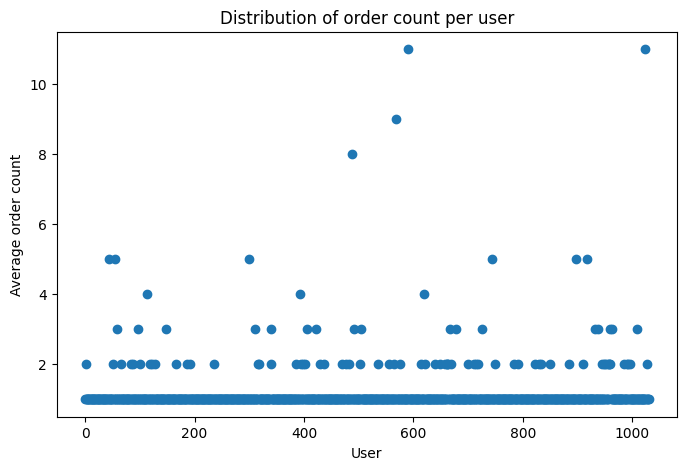

In [22]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(8, 5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Distribution of order count per user')
plt.xlabel('User')
plt.ylabel('Average order count')
plt.show()

To further analyze the outliers, we can calculate the 95th and 99th percentiles of the number of orders per user. This will help us identify the threshold beyond which orders can be considered outliers. We can then decide whether to exclude these outliers from our analysis or adjust our approach accordingly.

In [23]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Based on the analysis, it appears that only 5% of users make more than 2 orders, and only 1% make more than 4 orders. Therefore, it seems reasonable to set the upper limit at 2 orders and filter out the remaining customers.

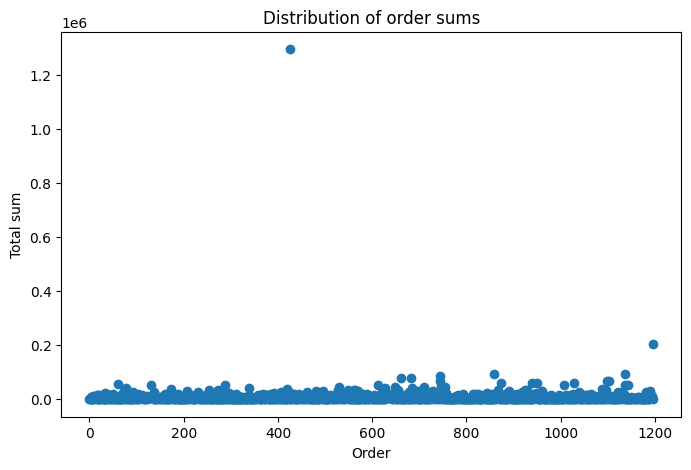

In [24]:
plt.figure(figsize=(8, 5))
x_values = pd.Series(range(0, len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.title('Distribution of order sums')
plt.xlabel('Order')
plt.ylabel('Total sum')
plt.show()

Based on the graph, the cost of the majority of orders is below 50,000 rubles. However, there were orders totaling around 200,000 rubles, and even 1.3 million rubles - presumably the outlier that influenced the cumulative data.

Since the graph does not allow us to precisely determine the upper limit, let's conduct an analysis using percentiles.

In [25]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


After studying the percentiles, it was found that only 5% of orders amount to more than 28,000, and only 1% - more than 58,233. In this case, the upper limit for identifying anomalous orders should be set at the amount of 28,000.

#### Hypotheses Testing on Raw Data

Null Hypothesis (H0): There are no differences between the average number of orders per user in group B and group A.

Alternative Hypothesis (H1): There are differences between the average number of orders per user in group B and group A.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [27]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05

print(f"Statistical significance: {alpha}")

print("P-value: {0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Relative difference between the average number of orders in group B and group A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Statistical significance: 0.05
P-value: 0.01679
Relative difference between the average number of orders in group B and group A: 0.138


According to the results, the p-value calculated from the raw data is significantly less than the significance level of 0.05, allowing us to reject the null hypothesis of equality of means. The difference between the average number of orders in the two groups was 13.8% in favor of group B.

Null Hypothesis (H0): There is no difference between the average order value in group A and group B.

Alternative Hypothesis (H1): There are differences between the average order values in groups A and B.

In [28]:
print(f"Statistical significance: {alpha}")
print('P-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Relative difference between the average bill of groups A and B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Statistical significance: 0.05
P-value: 0.729
Relative difference between the average bill of groups A and B: 0.259


The p-value significantly exceeds 0.05, which does not allow us to reject the hypothesis of equality of the average order value between the groups. However, the relative difference was as much as 25.9%. Outliers may have a strong influence on the data, so let's test the hypotheses on cleaned datasets.

#### Hypothesis testing using data cleaned from outliers

In [29]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

Null Hypothesis (H0) - There are no differences in the average number of orders per user between group B and group A.

Alternative Hypothesis (H1) - There are differences in the average number of orders per user between group B and group A.

In [30]:
sampleAFiltered = sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print(f"Statistical significance: {alpha}")
print('P-value: {0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Relative difference in average order count in groups A and B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Statistical significance: 0.05
P-value: 0.01304
Relative difference in average order count in groups A and B: 0.173


After cleaning the data from outliers, the p-value was 0.013, which is lower than the significance level of 0.05. There is evidence to reject the null hypothesis of equal number of orders. In this case, the average number of orders in group B is 17.3% higher than in group A.

Null Hypothesis (H0): There are no differences between the average check in group A and group B.

Alternative Hypothesis (H1): There are differences between the average checks in groups A and B.

In [31]:
print(f"Statistical significance: {alpha}")
print(
    'P-value: {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Relative difference between average bills in groups A and B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Statistical significance: 0.05
P-value: 0.738
Relative difference between average bills in groups A and B: -0.020


As expected, outliers had a significant impact on the data. However, the Mann-Whitney U test, due to its robustness to outliers, showed nearly the same p-value as before outlier processing. The hypothesis of equal average checks is not rejected, and the relative difference this time was only 2%. The average checks in the groups do not differ.

### Conclusion

Based on the analysis of the A/B test results conducted in the online store during August 2019, the following conclusions can be drawn:

1) There is no significant difference in revenue between groups A and B - the average check for both groups is approximately the same.

2) Group B significantly outperforms group A in terms of the number of orders. Users in group B make an average of 17% more purchases than group A.

Additionally, the following facts were established:

- 95% of users make no more than 2 orders. Only 1% of buyers make more than 4 orders.

- Only 5% of orders on average exceed 28000, and 1% of all orders were for more than 58000.

<b>Based on the A/B test results, it can be concluded that group B outperforms group A in terms of the number of orders. All metrics have been studied and recorded - it is possible to declare the victory of group B and stop the test.</b>